# at home｜空き家バンク

>和歌山県売買物件

at homeからデータを取得

In [1]:
import requests
# REQUEST_URL = "https://www.akiya-athome.jp/buy/30/"
REQUEST_URL = "https://www.akiya-athome.jp/buy/30/?br_kbn=buy&pref_cd=30&page=1&search_sort=kokai_date&item_count=50" #表示を50件と設定
res = requests.get(REQUEST_URL)
res.encoding = 'utf-8'

In [2]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(res.text, "html.parser")

cssセレクタを使って１件目の物件詳細情報を抽出

In [3]:
# html全体を格納しているsoupからsectionというcssセレクタを使って抽出
home_section = soup.select("section.propety")[0]

In [4]:
# 物件詳細が記載されているdiv要素を抽出
home_info = home_section.select("div")[2]

In [5]:
print("価格:", home_info.select("dl dd")[0].text.replace("万円", "").replace(",", ""))
print("間取:", home_info.select("dl dd")[1].text)
print("建物面積:", home_info.select("dl dd")[2].text.replace("㎡", ""))
print("土地面積:", home_info.select("dl dd")[3].text.replace("㎡", ""))
print("私道負担面積:", home_info.select("dl dd")[4].text)
print("物件種目:", home_info.select("dl dd")[5].text)
print("築年月:", home_info.select("dl dd")[6].text)
print("所在地:", home_info.select("dl dd")[7].text)
print("交通:", home_info.select("dl dd")[8].text)

価格: 1480
間取: 4LDK
建物面積: 150.66
土地面積: 262.97
私道負担面積: 
物件種目: 売戸建
築年月: 1996年8月
所在地: 和歌山県紀の川市粉河
交通: ＪＲ和歌山線 粉河駅 / 車4分


cssセレクタを使って全件の物件詳細情報を抽出するための準備

In [6]:
# html全体を格納しているsoupからsectionというcssセレクタを使って抽出　全件
home_section = soup.select("section.propety")

In [7]:
# 取得したhome_sectionの数の確認
len(home_section)

46

In [8]:
# 空の配列を準備
HomePrice = [] # "価格"
HomeSpace = [] # "間取"
HomeArea = [] # "建物面積"
LandArea = [] # "土地面積"
PrivateArea = [] # "私道負担面積"
HomeCategry = [] # "物件種目"
HomeYear = [] # "築年月"
HomePlace = [] # "所在地"
HomePaciffic = [] # "交通"

# home_sectionから任意のsectionを1つ選んでhsに代入して実行します。
hs = home_section[3]

# hsに格納されたhtmlであるsectionから物件の詳細が載っているdivを抽出
hi = hs.select("div")[2]

# 価格をhi1に代入
hi1 = hi.select("dl dd")[0].text.replace("万円", "").replace(",", "")
# "間取"をhi2に代入
hi2 = hi.select("dl dd")[1].text
# "建物面積"をhi3に代入
hi3 = hi.select("dl dd")[2].text.replace("㎡", "")
# "土地面積"をhi4に代入
hi4 = hi.select("dl dd")[3].text.replace("㎡", "")
# "私道負担面積"をhi5に代入
hi5 = hi.select("dl dd")[4].text
# "物件種目"をhi6に代入
hi6 = hi.select("dl dd")[5].text
# "築年月"をhi7に代入
hi7 = hi.select("dl dd")[6].text
# "所在地"をhi8に代入
hi8 = hi.select("dl dd")[7].text
# "交通"をhi9に代入
hi9 = hi.select("dl dd")[8].text

# それぞれ抽出した情報hs1~hs4までのデータを配列に追加
HomePrice.append(hi1)
HomeSpace.append(hi2)
HomeArea.append(hi3)
LandArea.append(hi4)
PrivateArea.append(hi5)
HomeCategry.append(hi6)
HomeYear.append(hi7)
HomePlace.append(hi8)
HomePaciffic.append(hi9)

In [9]:
# 物件詳細の中身を確認
print(HomePrice)
print(HomeSpace)
print(HomeArea)
print(LandArea)
print(PrivateArea)
print(HomeCategry)
print(HomeYear)
print(HomePlace)
print(HomePaciffic)

['600']
['5DK']
['125.44']
['105.88']
['']
['売戸建']
['1975年8月']
['和歌山県和歌山市紀三井寺']
['ＪＲ紀勢本線 紀三井寺駅 / 徒歩8分']


cssセレクタを使って全件の物件詳細情報を抽出する

In [10]:
# 空の配列を準備
HomePrice = [] # "価格"
HomeSpace = [] # "間取"
HomeArea = [] # "建物面積"
LandArea = [] # "土地面積"
PrivateArea = [] # "私道負担面積"
HomeCategry = [] # "物件種目"
HomeYear = [] # "築年月"
HomePlace = [] # "所在地"
HomePaciffic = [] # "交通"

# home_sectionからsectionを1つずつ取り出してhsに代入して実行します。
for hs in home_section:
    # hsに格納されたhtmlであるsectionから物件の詳細が載っているdivを抽出
    hi = hs.select("div")[2]

    # 価格をhi1に代入
    hi1 = hi.select("dl dd")[0].text.replace("万円", "").replace(",", "").replace("相談", "")
    # "間取"をhi2に代入
    hi2 = hi.select("dl dd")[1].text.replace("不明", "")
    # "建物面積"をhi3に代入
    hi3 = hi.select("dl dd")[2].text.replace("㎡", "").replace("面積不明", "")
    # "土地面積"をhi4に代入
    hi4 = hi.select("dl dd")[3].text.replace("㎡", "").replace("面積不明", "")
    # "私道負担面積"をhi5に代入
    hi5 = hi.select("dl dd")[4].text
    # "物件種目"をhi6に代入
    hi6 = hi.select("dl dd")[5].text
    # "築年月"をhi7に代入
    hi7 = hi.select("dl dd")[6].text
    # "所在地"をhi8に代入
    hi8 = hi.select("dl dd")[7].text
    # "交通"をhi9に代入
    hi9 = hi.select("dl dd")[8].text

    # それぞれ抽出した情報hs1~hs4までのデータを配列に追加
    HomePrice.append(hi1)
    HomeSpace.append(hi2)
    HomeArea.append(hi3)
    LandArea.append(hi4)
    PrivateArea.append(hi5)
    HomeCategry.append(hi6)
    HomeYear.append(hi7)
    HomePlace.append(hi8)
    HomePaciffic.append(hi9)


DataFrameに抽出したデータを格納する

In [11]:
# pandasのデータフレームに使うデータを定義します。
data_list = {
     "HomePrice" : HomePrice,
     "HomeSpace" : HomeSpace,
     "HomeArea" : HomeArea,
     "LandArea" : LandArea,
     "PrivateArea" : PrivateArea,
     "HomeCategry" : HomeCategry,
     "HomeYear" : HomeYear,
     "HomePlace" : HomePlace,
     "HomePaciffic" : HomePaciffic,
}

In [12]:
# 定義したデータをpandasに読み込ませます
# pd.DataFrame(ここにデータ)でデータフレームに変換できます。

import pandas as pd
df = pd.DataFrame(data_list)

抽出データの可視化　建物面積に対する物件価格

In [13]:
# 空の行、土地売りで読み込みが変な行は削除
df_ = df.drop([21,24,27,32,35,40,43]).reset_index(drop=True)
df_

,HomePrice,HomeSpace,HomeArea,LandArea,PrivateArea,HomeCategry,HomeYear,HomePlace,HomePaciffic
0,1480,4LDK,150.66,262.97,,売戸建,1996年8月,和歌山県紀の川市粉河,ＪＲ和歌山線 粉河駅 / 車4分
1,180,10DK,145.11,533.91,,売戸建,1962年1月,和歌山県紀の川市高野,ＪＲ和歌山線 打田駅 / 車12分
2,130,3DK,52.16,79.61,,売戸建,1974年11月,和歌山県紀の川市東国分,ＪＲ和歌山線 下井阪駅 / 車3分
3,600,5DK,125.44,105.88,,売戸建,1975年8月,和歌山県和歌山市紀三井寺,ＪＲ紀勢本線 紀三井寺駅 / 徒歩8分
4,300,4DK,55.89,79.92,,売戸建,不詳,和歌山県紀の川市貴志川町鳥居,和歌山電鐵貴志川線 甘露寺前駅 / 車2分
5,1500,6DK,114.44,307.44,,売戸建,不詳,和歌山県紀の川市打田,ＪＲ和歌山線 打田駅 / 徒歩10分
6,280,6DK,132,379,,売戸建,不詳,和歌山県紀の川市西脇,ＪＲ和歌山線 名手駅 / 車7分
7,800,6LDK,169.93,683.03,,売戸建,不詳,和歌山県有田郡広川町大字広,ＪＲ紀勢本線 湯浅駅 / 徒歩8分
8,800,5DK,89.25,600.5,,売戸建,不詳,和歌山県紀の川市登尾,ＪＲ和歌山線 打田駅 / 車8分
9,700,5LDK,111.56,262.55,,売戸建,1982年1月,和歌山県有田郡広川町大字広,ＪＲ紀勢本線 広川ビーチ駅 / 車4分


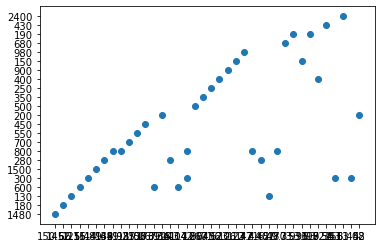

In [14]:
# matplotlibで散布図を作成
import matplotlib.pyplot as plt 
plt.scatter(df_['HomeArea'],df_['HomePrice'])

In [15]:
print(type(df_["HomeArea"][0])) # 変数の型
print(type(df_["HomePrice"][0])) # 変数の型

<class 'str'>
<class 'str'>


取得したデータの型をプロット出来る数字に変換

In [16]:
x = [] # 数字に変換した建物面積を追加するための空配列
y = [] # 数字に変換した物件価格を追加するための空配列

for i in range(0, len(df_)):
    # 建物面積の文字列を浮動小数点数に変換
    home_area_str = df_["HomeArea"][i]
    if home_area_str.strip():  # 空白でない場合のみ変換
        a1 = float(home_area_str)
        x.append(a1)
    else:
        continue

    # 物件価格の文字列を整数に変換
    home_price_str = df_["HomePrice"][i]
    if home_price_str.strip():  # 空白でない場合のみ変換
        a2 = int(home_price_str)
        y.append(a2)
    else:
        continue

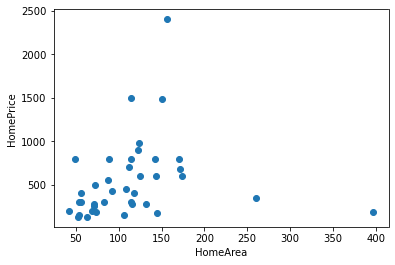

In [17]:
# 建物面積に対する物件価格の可視化
plt.scatter(x, y) # 用意したxとyの配列をplt.scatter(x軸の値, y軸の値)として代入
plt.xlabel("HomeArea") # x軸のラベルを設定
plt.ylabel("HomePrice") # y軸のラベルを設定
plt.show()